In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [209]:
train_data = pd.read_csv("Data/train.csv")

In [210]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [211]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [212]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the Heatmap we notice positive correlation between number of Survived people and Fare as well as strong negative correlation between it and the Ticket class (Pclass), this is because Pclass is nummeric in data(1 = 1st, 2 = 2nd, 3 = 3rd) 

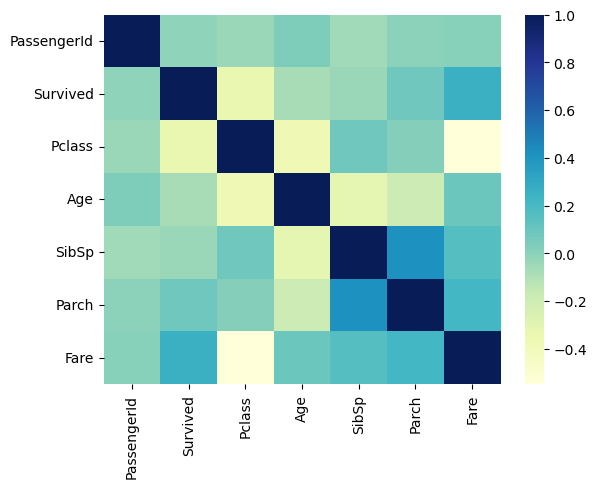

In [213]:
numeric_data = train_data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), cmap= "YlGnBu")
plt.show()

Now we will spit our training dataset to 80% for model training and 20% for testing and since we don't want to depend on randomness we will use **Stratified Shuffle Split** which make sure that both sets are representative of the overall distribution of the data

<h3> First: The Stratification </h3>

In [214]:
from sklearn.model_selection import StratifiedShuffleSplit
#splits number is one
#Proportion of the dataset to include in the test split. In this case, 20% of the data.
#no need for reproduction so, there is no random_state parameter 
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)

<h3> Second: The Shuffling </h3>

Randomly shuffles the data before splitting it into training and test sets, ensuring that the splits are randomized.

In [215]:
for train_indices , test_indices in split.split(train_data, train_data[["Survived","Pclass","Sex"]]):
    stratified_train_set = train_data.loc[train_indices]
    stratified_test_set = train_data.loc[test_indices]

<h3> Now we have representative data for training and testing the model </h3>

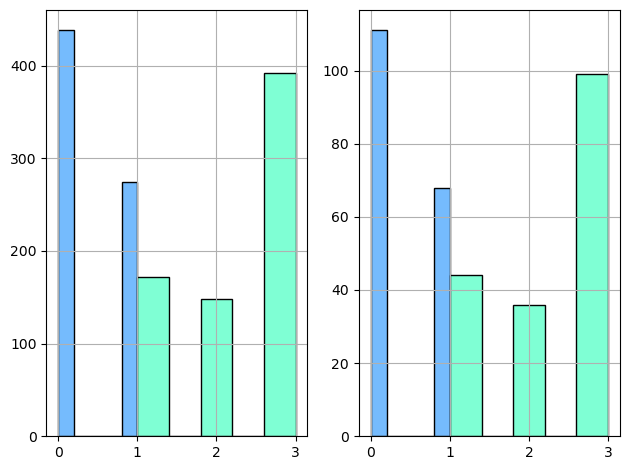

In [216]:
plt.subplot(1,2,1)
stratified_train_set["Survived"].hist(bins=5, color='xkcd:sky blue', edgecolor='black')
stratified_train_set["Pclass"].hist(bins=5, color='aquamarine', edgecolor='black')
plt.subplot(1,2,2)
stratified_test_set["Survived"].hist(bins=5, color='xkcd:sky blue', edgecolor='black')
stratified_test_set["Pclass"].hist(bins=5, color='aquamarine', edgecolor='black')
plt.tight_layout()

<h3> Now we need to check for the missing values in data </h3>

In [217]:
stratified_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 829 to 338
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          573 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        161 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [218]:
stratified_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 557 to 283
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Survived     179 non-null    int64  
 2   Pclass       179 non-null    int64  
 3   Name         179 non-null    object 
 4   Sex          179 non-null    object 
 5   Age          141 non-null    float64
 6   SibSp        179 non-null    int64  
 7   Parch        179 non-null    int64  
 8   Ticket       179 non-null    object 
 9   Fare         179 non-null    float64
 10  Cabin        43 non-null     object 
 11  Embarked     179 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.2+ KB


<h4>
    Since the missing values are in more than 100 rows we will need to impute the data to not lose any valuable insight. 
</h4>

For here we will be imputting age column by **mean** value

<h3> Imputation by Estimators </h3>

In [219]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

This class inherits from BaseEstimator and TransformerMixin, which are base classes from scikit-learn used to create custom transformers that can be integrated into scikit-learn pipelines.

In [220]:
class AgeImputer(BaseEstimator, TransformerMixin):
    # standard practice when the transformation does not require fitting
    def fit(self,x,y=None):
        return self #since no calculations needed
    def transform(self,x,y=None):
        imputer = SimpleImputer(strategy = "mean")
        x["Age"] = imputer.fit_transform(x[["Age"]])
        return x

<h3>
    Encoding
</h3>

Here we will use One hot encoding to change some categorical data to Binary data

In [221]:
from sklearn.preprocessing import OneHotEncoder

In [222]:
class FeatureEncoding(BaseEstimator, TransformerMixin):
    def fit(self,x,y=None):
        return self #since no calculations needed
    def transform(self,x,y=None):
        encoder = OneHotEncoder()
        #double square brackets ([["Embarked"]]) ensure that the result is a DataFrame, not a Series. 
        #This is important because OneHotEncoder expects a 2D array-like structure as input, which a DataFrame provides.
        matrix = encoder.fit_transform(x[["Embarked"]]).toarray()
        column_names = ["C","S","Q","N"]
        #matrix transpose
        for i in range(len(matrix.T)):
            x[column_names[i]] = matrix.T[i]
        matrix = encoder.fit_transform(x[["Sex"]]).toarray()
        column_names = ["Male","Female"]
        #matrix transpose
        for i in range(len(matrix.T)):
            x[column_names[i]] = matrix.T[i] 
        return x    
        

<h3>
    Feature Droping
</h3>

In [223]:
class FeatureDroping(BaseEstimator, TransformerMixin):
    def fit(self,x,y=None):
        return self #since no calculations needed
    def transform(self,x,y=None):
        #axis =1 -> drop columns not rows
        return x.drop(["Name","Ticket","Embarked","Sex","Cabin","N"], axis = 1 , errors = "ignore")    

<h2>
    Pipeline
</h2>

In [224]:
from sklearn.pipeline import Pipeline

In [225]:
#list of tuples
pipeline = Pipeline([("ageImputer",AgeImputer()),
                     ("featureEncoding",FeatureEncoding()),
                     ("featureDroping",FeatureDroping())
                    ])

In [226]:
stratified_train_set = pipeline.fit_transform(stratified_train_set)

In [227]:
stratified_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Male,Female
829,830,1,1,62.000000,0,0,80.0000,0.0,0.0,0.0,1.0,0.0
595,596,0,3,36.000000,1,1,24.1500,0.0,0.0,1.0,0.0,1.0
336,337,0,1,29.000000,1,0,66.6000,0.0,0.0,1.0,0.0,1.0
201,202,0,3,29.551483,8,2,69.5500,0.0,0.0,1.0,0.0,1.0
767,768,0,3,30.500000,0,0,7.7500,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30,31,0,1,40.000000,0,0,27.7208,1.0,0.0,0.0,0.0,1.0
293,294,0,3,24.000000,0,0,8.8500,0.0,0.0,1.0,1.0,0.0
547,548,1,2,29.551483,0,0,13.8625,1.0,0.0,0.0,0.0,1.0
350,351,0,3,23.000000,0,0,9.2250,0.0,0.0,1.0,0.0,1.0


<h3>The following code is for preparing the data for machine learning:</h3>
X is the <b>feature set</b> , obtained by dropping the Survived column.<br>
Y is the <b>target set</b> , containing only the Survived column. (mean = 0, std =1) <br>
StandardScaler is used to standardize the features.<br>
The features (X) are scaled and stored in x_data.<br>
The target variable (Y) is converted to a NumPy array and stored in y_data.

In [228]:
from sklearn.preprocessing import StandardScaler

In [241]:
#Dropping the Target Column to Create Feature Set
X = stratified_train_set.drop(["Survived"], axis =1)
#Extracting the Target Column to Create Target Set
Y = stratified_train_set[["Survived"]] # Y-> DataFrame
#used to standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
#NumPy array where the features have been standardized.
x_data = scaler.fit_transform(X)
#many machine learning libraries expect inputs to be in NumPy array format
y_data = Y.to_numpy().ravel()

Standardizing features is crucial for ensuring that machine learning models perform optimally and reliably across different datasets. It *enhances model convergence*,and *improves performance*. By reducing the impact of differing scales and *outliers*, standardization prepares the data for a more robust and effective modeling process.

<h1>
    Random Forest Classifier
</h1>

<h2>Stratified Train data</h2>

In [242]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [243]:
classifier = RandomForestClassifier()
parameter_grid = [{"n_estimators":[10,100,200,500],
                   "max_depth":[None,5,10],
                   "min_samples_split":[2,3,4]
                  }]
grid_search = GridSearchCV(classifier, parameter_grid, cv=3, scoring ="accuracy",return_train_score = True)
grid_search.fit(x_data,y_data)
final_classifier = grid_search.best_estimator_

In [244]:
final_classifier

RandomForestClassifier(min_samples_split=4, n_estimators=500)

<h2>Stratified Test data</h2>

<h3>First: Pipeline </h3>

In [ ]:
stratified_test_set = pipeline.fit_transform(stratified_test_set)

<h3>Second: Scaling</h3>

In [257]:
X_test = stratified_test_set.drop(["Survived"], axis = 1)
Y_test = stratified_test_set[["Survived"]]
scaler = StandardScaler()
x_test_data = scaler.fit_transform(X_test)
y_test_data = Y_test.to_numpy().ravel()

<h3>Evaluation</h3>

In [252]:
final_classifier.score(x_test_data, y_test_data)

0.8268156424581006

<h2>Titanic training data</h2>

<h3>First: Pipeline </h3>

In [254]:
final_data = train_data
final_data = pipeline.fit_transform(final_data)

<h3>Second: Scaling</h3>

In [258]:
X_final = final_data.drop(["Survived"], axis =1)
Y_final = final_data[["Survived"]]
scaler = StandardScaler()
x_final_data = scaler.fit_transform(X_final)
y_final_data = Y_final.to_numpy().ravel()

<h3>Evaluation</h3>

In [259]:
f_classifier = RandomForestClassifier()
parameter_grid = [{"n_estimators":[10,100,200,500],
                   "max_depth":[None,5,10],
                   "min_samples_split":[2,3,4]
                  }]
grid_search = GridSearchCV(final_classifier, parameter_grid, cv=3, scoring ="accuracy",return_train_score = True)
grid_search.fit(x_final_data,y_final_data)
f_classifier = grid_search.best_estimator_

In [260]:
f_classifier

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=200)

<h2>Titanic testing data</h2>

In [266]:
titanic_test_data = pd.read_csv("Data/test.csv")

<h3>First: Pipeline </h3>

In [267]:
titanic_test_data = pipeline.fit_transform(titanic_test_data)

<h3>Second: Check Null values </h3>

In [274]:
X_test_data = titanic_test_data
X_test_data = X_test_data.ffill()

<h3>Third: Scaling</h3>

In [275]:
scaler = StandardScaler()
x_test_data = scaler.fit_transform(X_test_data)

<h1>
    Results
</h1>

In [277]:
predictions = f_classifier.predict(x_test_data)
results_df = pd.DataFrame(titanic_test_data["PassengerId"])
results_df["Survived"] = predictions

<h3>Creating the csv file</h3>

In [279]:
results_df.to_csv("Data/results.csv", index = False)